<H1><center>Project 3<BR><BR>
Linear Regression and Logistic Regression</center></H1>

<H2>Task 1: Ethics of Artificial Intelligence
</H2>

<P>Read <a href="https://www.wired.com/story/artificial-intelligence-seeks-an-ethical-conscience/">this article</a> about ethical considerations in artificial intelligence.</P>

<P>Please address (minimum 200 words) the following questions in the space below. As the article describes, "many machine-learning systems are now essentially black boxes; their creators know they work, but they can't explain exactly why they make particular decisions." In other words, they are not <em>interpretable</em>. Consider many of the machine learning applications mentioned by the article, e.g., image processing, criminal justice, hiring, healthcare, military. Are there machine learning applications where you would sacrifice accuracy for interpretability? Are there machine learning applications where you would sacrifice interpretability for accuracy? The article concludes with the quote "Are there some things that we just shouldn't build?" What is your response to this question?</P>

The trade off between accuracy and interpretability is an unfortunate reality of many machine learning algorithms. There are few situations wherein I would be comfortable sacrificing interpretability for accuracy. In the case of machine learning algorithms used for diagnostic medicine, such as those used to identify cancer or other life-threatening illnesses, a very high accuracy would be worth the lack of interpretability. While this is not ideal, as there are likely many valuable insights to be gained from understanding those algorithms, the benefits outweigh the costs. This might also be extended to algorithms which evaluate someones risk of mental or physical illness, but there may be greater harms associated with such algorithms if they were freely available. For example, such a risk-evaluating algorithm could be used by insurance companies to deny or up-charge patients who are at a greater risk for illness, and not knowing the reasoning being the evaluations could result in discrimination or incorrectly attributing a casual relationship to the incorrect features. I would be more comfortable sacrificing accuracy for interpretability when the consequences of inaccurate classification are lower, and the likelihood of proliferating biases in existing data are higher.  Such situations might include algorithms used to screen job applicants or in facial recognition.   

I do believe that there are things that shouldn't be built. Every new piece of technology should be scrutinized and the potential detrimental side effects should be weighed with the benefits. Any algorithm which might be used to systemically target and discriminate against a group should not exist. The difficulty in enforcing any relevant policy comes with identifying potential abuses of a technology that does not exist yet.

<H2>Task 2: Linear Regression
</H2>

<P>In this task, you will use linear regression to predict people's medical costs. Recall that linear regression is often used to predict <em>real</em>-valued results whereas logistic regression is often used to predict <em>classes</em>.</P>

<P>The data for this task <a href="https://www.kaggle.com/mirichoi0218/insurance">comes from Kaggle</a> and can be found in the CSV file <code>insurance.csv</code> that you downloaded as part of this project. For each of 1,338 people, we have the following information:
<UL>
<li>Sex: male or female</li>
<li>BMI: body mass index</li>
<li>Children: number of children</li>
<li>Smoker: no or yes</li>
<li>Residential Region in the US: southwest, southeast, northeast, northwest</li>
<li>Medical Costs: in dollars</li>
</UL>
</P>

<P>Your goal is to predict the annual medical cost for someone based on their sex, bmi, number of children, whether they are a smoker, and their residential region.</P>

<P>One of the challenges is that not all of the data are numerical, and many of our machine learning algorithms prefer to work with numbers rather than, say, strings of text. Correspondingly, it is not straightforward to use the <code>numpy</code> function <code>loadtxt</code> to read in the data from the <code>insurance.csv</code> file. To start, write Python code to read in the data from the <code>insurance.csv</code> file. You should convert any non-numerical features into numerical features. For non-numerical features with only two distinct values, e.g., sex ("male" or "female") and smoker ("no" or "yes"), you can replace the text values with corresponding numerical values of 0 or 1. For the non-numerical features with more than two distinct values, i.e., residential region ("southwest", "southeast", "northeast", "northwest"), you should replace the one feature with four binary features corresponding to whether the person resides in the southwest (0 or 1), whether the person resides in the southeast (0 or 1), whether the person resides in the northeast (0 or 1), and whether the person resides in the northwest (0 or 1). Thus, we will increase the number of features by 3. Changing a single categorical feature into multiple binary features in this way is known as <em>one-hot encoding</em>. Ultimately, you need to store all the data in numerical form in a <code>numpy</code> array <code>X</code> for the nine features and a <code>numpy</code> array <code>y</code> for the real-valued medical costs that you are trying to predict.</P>

<P>Write Python code below to read in the file <code>insurance.csv</code>, convert the non-numerical data into numerical data, and store the results in two <code>numpy</code> arrays <code>X</code> and <code>y</code>.</P>

In [45]:
# Read in CSV file ignoring header row.
# Convert non-numerical data into numerical data.
# Store features vectors in numpy array X and real-valued labels in array y.

import numpy as np

def convert(word):
    convert = {'male':[0], 'female':[1], 'no':[0], 'yes':[1], 'northeast':[1,0,0,0], 'northwest':[0,1,0,0], 'southeast':[0,0,1,0], 'southwest':[0,0,0,1]}
    try:
        return [float(word)]
    except ValueError:
        return convert[word]


def readOneHotEncode(txt):
    DATA = []
    in_file = open(txt, 'r')
    headers = in_file.readline().replace('region', 'northeast, northwest, southeast, southwest').strip('\n').split(',')
    row = in_file.readline()
    while(row):
        encode_row = []
        new_row = [encode_row.extend(item) for item in list(map(convert, row.split(',')))]
#         print(encode_row)
        DATA.append(np.array(encode_row))
            
        row = in_file.readline()
    in_file.close()
    DATA = np.array(DATA)
    return DATA[:,:-1], DATA[:,-1], headers


X, y, headers = readOneHotEncode('insurance.csv')

print(headers,X,y)

['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', ' northwest', ' southeast', ' southwest', 'charges'] [[ 19.     1.    27.9  ...,   0.     0.     1.  ]
 [ 18.     0.    33.77 ...,   0.     1.     0.  ]
 [ 28.     0.    33.   ...,   0.     1.     0.  ]
 ..., 
 [ 18.     1.    36.85 ...,   0.     1.     0.  ]
 [ 21.     1.    25.8  ...,   0.     0.     1.  ]
 [ 61.     1.    29.07 ...,   1.     0.     0.  ]] [ 16884.924    1725.5523   4449.462  ...,   1629.8335   2007.945
  29141.3603]


<P>Once you have your feature vectors in array <code>X</code> and your real-valued labels in array <code>y</code>, split the data into training (80%) and testing (20%) and train a linear regression classifier using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"><code>sklearn.linear_model.LinearRegression</code></a>. Then <code>score</code> your model on the <em>test</em> data and report the R<sup>2</sup> coefficient score. If you print out the attribute <code>coef&#95;</code> of your <code>LinearRegression</code> instance, you can see the feature weights of your trained model.</P>

In [49]:
# Split data into training (80%) and testing (20%)
# Train linear regression model on training data.
# Predict medical costs for testing data and score the results.
# Print out feature weights of trained LinearRegression model.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 

LR = LinearRegression().fit(X_train, y_train)
print(headers)
print(LR.coef_)
LR.score(X_test,y_test)










['age', 'sex', 'bmi', 'children', 'smoker', 'northeast', ' northwest', ' southeast', ' southwest', 'charges']
[  2.56975706e+02   1.85916916e+01   3.37092552e+02   4.25278784e+02
   2.36511289e+04   4.59585244e+02   8.89079180e+01  -1.98279052e+02
  -3.50214110e+02]


0.78359297671207218

<P><font color="maroon"><u>What is the score, i.e., R<sup>2</sup> coefficient, of your linear regression model on the <em>test</em> data? What feature has the highest (absolute value) weight, i.e., contributes most to determining medical costs? What feature has the lowest (absolute value) weight, i.e., contributes least to determining medical costs?<u></font></P>

Score on test data: 0.78359297671207218

Highest weight feature: smoker

Lowest weight feature: southwest


<P>While walking around campus, have you bumped into Wendy Wellesley lately? She is 21 years old, female, has a BMI of 28.5, has no children, does not smoke, and lives in the northeast. Use your trained linear regression model to predict her medical cost this year.</P> 

In [57]:
# Predict medical costs for Wendy Wellesley, who is 21 years old, female, 
# has a BMI of 28.5, has no children, does not smoke, and lives in the northeast.

wendy = np.array([21.0,1,28.5,0,0,1,0,0,0]).reshape(1,-1)
LR.predict(wendy)



array([ 3072.40850267])

<P><font color="maroon"><u>What is Wendy Wellesley's predicted medical cost?<u></font></P>

3072.40850267

<H2>Task 3: Non-Linear Logistic Regression
</H2>

<P>While you used <em>linear</em> regression in the previous task, you will now turn to <em>logistic</em> regression for the remainder of this project. To start, you will explore non-linear logistic regression.</P>
<P>The code below reads in a file of data corresponding to two classes and plots the data.</P>

In [58]:
# Read in data and store feature vectors in array X and labels in array y
import numpy as np
np.random.seed(42)
DATA = np.loadtxt('nonlinear.csv', delimiter=',', skiprows=1)
X = DATA[:,:-1]
y = DATA[:,-1]

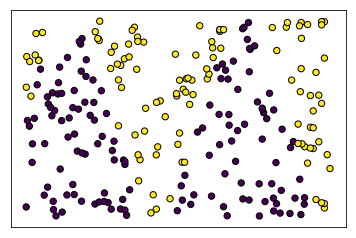

In [59]:
# Plot data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, s=40, edgecolor='k')
plt.xticks([])
plt.yticks([])
plt.show()

<P>You will use logistic regression to classify the above data. However, looking at the plot above, the data do not appear to be linearly separable. Thus, you will be generating polynomial combinations of the features in order to create new features prior to classifying the data with logistic regression.</P>
<P>First, let's split the data into training and testing data...</P>

In [61]:
# Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<P>Your task is to explore how logistic regression performs when using different polynomial combinations of the features. Here, you should experiment with polynomial combinations of degree 1, 2, 3, 4, 5, 6, 7, 8, 9, and 10. A 1 degree polynomial combination of the features is simply the original features. A 2 degree polynomial combination of the features includes squared versions of the original features. A 3 degree polynomial combination of the features includes cubic versions of the original features. And so on. For each of 10 different polynomial degrees, you should create new features corresponding to polynomial combinations of the original features. You should use <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html"><code>sklearn.preprocessing.PolynomialFeatures</code></a> to generate the new sets of feature combinations. When generating features, you should first use the <em>training</em> data to <code>fit</code> the features and then <code>transform</code> separately both the <em>training</em> data and the <em>testing</em> data to create new features.</P>

<P>For each of the 10 polynomial degrees, you should train an <a href = "http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"><code>sklearn</code> Logistic Regression classifier</a> on the transformed <em>training</em> data and then report the accuracy of the classifier on the transformed <em>testing</em> data. Thus, you should report 10 accuracies, one for each polynomial degree.</P>

In [63]:
# Generate features corresponding to different degree polynomial combinations and print the accuracy for each degree

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def PolyLogRegression(degree, X_train, y_train, X_test, y_test):
    
    poly = PolynomialFeatures(degree)

    #first use training data to fit features
    poly.fit(X_train, y_train)


    #transform training data to create new features

    tr_X_train = poly.transform(X_train)


    #transform testing data to create new features

    tr_X_test = poly.transform(X_test)
    
    #logistic regression
    
    clf = LogisticRegression().fit(tr_X_train, y_train)
    
    return clf.score(tr_X_test,y_test)

for d in degrees:
    print(d, PolyLogRegression(d, X_train, y_train, X_test, y_test))
    


1 0.7
2 0.72
3 0.76
4 0.88
5 0.98
6 0.72
7 0.7
8 0.72
9 0.7
10 0.74


<P><font color="maroon"><u>For which of the ten polynomial degrees does the logistic regression classifier achieve the highest accuracy? What is the accuracy of the classifier at this optimal degree?<u></font></P>

Highest accuracy degree: 5 

Accuracy of optimal degree: 0.98

<P>It's worth noting that we are using <em>test</em> data above to evaluate different degree polynomials. If we were selecting the best degree polynomial to use as part of our classification pipeline, we would be tuning a hyperparameter (the degree of the polynomial) and we would need to instead evaluate the different degrees on <em>validation</em> data.</P>

<H2>Task 4: Evaluating Classifiers for Diagnosing Cancers as Benign or Malignant 
</H2>

<P>For the next few tasks, you will be using <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">breast cancer data</a> to diagnose whether a cancer is benign (0) or malignant (1). The features are derived from a digitized image of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image, including the radius, texture, perimeter, area, smoothness, compactness, concavity, number of concave points, symmetry, and fractal dimension, with the mean, standard error, and worst value provided for each.</P>
<P>To begin, read in the CSV file <code>breast_cancer.csv</code>, ignoring the header line, and store the feature vectors in an array <code>X</code> and the labels in an array <code>y</code>.</P>

In [65]:
# Read in data and store feature vectors in array X and labels in array y

DATA = np.loadtxt('breast_cancer.csv',skiprows=1, delimiter=',')
X,y = DATA[:,:-1], DATA[:,-1]




<P>Now seed the <code>numpy</code> random number generator and then split the data into 80% training data and 20% testing data.</P>

In [68]:
# Seed the random number generator.
# Split data into 80% training and 20% testing

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


<P>Let's evaluate the performance of four different <code>sklearn</code> classifiers, a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">decision tree</a>, a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html"><em>k</em> nearest neighbors classifier</a>, a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html">perceptron</a>, and a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">logistic regression classifier</a>. Since we may end up further using the best performing of the four classifiers, it is as if we are tuning a hyperparameter (where the hyperparameter is the classification algorithm), so we will evaluate the classifiers on <em>validation</em> data rather than <em>testing</em> data.</P>

<P>One option would be to split the <em>training</em> data into separate sets, one used only as <em>training</em> data and one used only as <em>validation</em> data. Instead, we will use 5-fold cross-validation where we will split the <em>training</em> data into five equal sized sets. Then, five times, we will use four of the sets as <em>training</em> data and the remaining set as <em>validation</em> data. The <em>validation</em> accuracy that we report will be the average validation accuracy over the five trials.</P>

<P>Thus, for each of the four classifiers, you should use 5-fold cross validation, and you should report the average accuracy of the classifier over the five validation trials. You should compute the average accuracy of a classifier from 5-fold cross validation using the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score"><code>sklearn cross_val_score</code></a> function. For each classifer, you should use its default parameter settings, except for the Perceptron where you should set the number of epochs to 10.</P>

In [78]:
# Compute the average 5-fold cross-validation accuracy for each of four classifiers (decision tree, kNN, perceptron, logistic regression)

from sklearn import linear_model  # Using sklearn Perceptron classifier
from sklearn import ensemble  # Using RandomForest classifier
from sklearn import neighbors  # Using nearest neighbors classifier
from sklearn.model_selection import cross_val_score

learners = {'Perceptron': linear_model.Perceptron(max_iter=10),
            'RandomForest': ensemble.RandomForestClassifier(),
            'kNN': neighbors.KNeighborsClassifier(),
            'LogisticRegression': LogisticRegression()
           }

for classifierName in learners:
    score = cross_val_score(learners[classifierName],X_train, y_train, cv=5)
    print('Accuracy of ' + classifierName + ':\t' + str(np.mean(score)))




Accuracy of LogisticRegression:	0.949351276743
Accuracy of Perceptron:	0.766834421617
Accuracy of RandomForest:	0.944979561501
Accuracy of kNN:	0.923049317832


<P><font color="maroon"><u>Which classifier yielded the highest cross-validation accuracy? What is the cross-validation accuracy of the logistic regression classifier?<u></font></P>

Logistic Regression yielded the highest cross-validation accuracy.
Accuracy of Logistic Regression:	0.949351276743

<H2>Task 5: Regularization 
</H2>

<P>While you explored different classifiers above, let's now focus only on logistic regression classification of the breast cancer data. In particular, let's explore <em>regularized</em> logistic regression. The <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html"><code>sklearn</code> logistic regression classifier</a> has a parameter <code>C</code> that controls regularization strength, like the regularization parameter &lambda; that we studied in class. However, the parameter <code>C</code> corresponds to the <em>inverse</em> of regularization strength so that smaller values of <code>C</code> specify stronger regularization. Below, you should experiment with seven different values for the parameter <code>C</code>: 1, 3, 10, 30, 100, 300, 1000. For each of these seven values for <code>C</code>, report the average 5-fold cross-validation accuracy of a logistic regression classifier.</P>

In [82]:
# Using 5-fold cross validation, tune the regularization hyperparameter C for logistic regression

Cs = [1, 3, 10, 30, 100, 300, 1000]

for c in Cs:
    score = cross_val_score(LogisticRegression(C=c),X_train, y_train, cv=5)
    print('Accuracy of C=' + str(c) + ':\t' + str(np.mean(score)))



Accuracy of C=1:	0.949351276743
Accuracy of C=3:	0.955944683336
Accuracy of C=10:	0.962562509954
Accuracy of C=30:	0.96038859691
Accuracy of C=100:	0.958166374688
Accuracy of C=300:	0.96038859691
Accuracy of C=1000:	0.95596857249


<P><font color="maroon"><u>Of the seven values you experimented with for the parameter <code>C</code>, which led to the highest average 5-fold cross-validation accuracy and what was its accuracy?<u></font></P>

C=10 led to the heightest accuracy. 

Accuracy of C=10:	0.962562509954

<H2>Task 6: Recall, Precision, and F1 Score
</H2>

<P>In Task 4 above, you determined the optimal value (among seven possibilities) for the regularization parameter <code>C</code> used by a logistic regression classifier on the breast cancer data. Using this optimal value for the parameter <code>C</code>, again train a logistic regression classifier on the breast cancer <em>training</em> data. In this task, rather than report the <em>accuracy</em> of the classifier on the <em>testing</em> data, you should report the <em>recall</em>, the <em>precision</em>, and the <em>F1</em> score of the classifier on the <em>testing</em> data. You may use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html"><code>sklearn.metrics.recall_score</code></a>, <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html"><code>sklearn.metrics.precision_score</code></a>, and <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html"><code>sklearn.metrics.f1_score</code></a> to compute the three scores.</P>

In [84]:
# Using the optimal value for the regularization parameter C,
# report the recall, precision, and F1 score of a logistic regression classifier.
from sklearn.metrics import recall_score, precision_score, f1_score

log_reg = LogisticRegression(C=10).fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

R = recall_score(y_test,y_pred)
P = precision_score(y_test,y_pred)
F1 = f1_score(y_test,y_pred)

print("Recall: "+str(R),"Precision: "+str(P), "F1 score: "+str(F1))

Recall: 0.906976744186 Precision: 0.975 F1 score: 0.939759036145


<P><font color="maroon"><u>What is the recall, precision, and F1 score of the logistic regression classifier on the <em>testing</em> data?<u></font></P>

Recall: 0.906976744186 

Precision: 0.975 

F1 score: 0.939759036145

<H2>Task 7: Feature Scaling
</H2>

<P>If you explore the breast cancer data, you will note that some features take on values in the thousands whereas other features never achieve values larger than 0.1. The features are not all on the same scale. Thus, you should perform feature scaling on the data prior to using your classifier.</P>

<P>Using <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><code>sklearn.preprocessing.StandardScaler</code></a>, you should perform feature scaling on the data. First, you should <code>fit</code> the <code>StandardScaler</code> with the <em>training</em> data. Then you can separately <code>transform</code> the <em>training</em> data and the <em>testing</em> data into "feature scaled" <em>training</em> data and "feature scaled" <em>testing</em> data, respectively. Finally, train your logistic regression classifier using the "feature scaled" <em>training</em> data and optimal regularization parameter <code>C</code> as determined in Task 4 above, and report the F1 score of the classifier on the "feature scaled" <em>testing</em> data.</P>

In [89]:
# After performing feature scaling (and using the optimal value for the regularization parameter C),
# report the F1 score of a logistic regression classifier.
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train,y_train)
scaled_X_train = scalar.transform(X_train)
scaled_X_test = scalar.transform(X_test)

fs_log_reg = LogisticRegression(C=10).fit(scaled_X_train,y_train)

fs_y_pred = fs_log_reg.predict(scaled_X_test)

R = recall_score(y_test,fs_y_pred)
P = precision_score(y_test,fs_y_pred)
F1 = f1_score(y_test,fs_y_pred)

print("Recall: "+str(R),"Precision: "+str(P), "F1 score: "+str(F1))

Recall: 0.976744186047 Precision: 0.954545454545 F1 score: 0.965517241379


<P><font color="maroon"><u>After applying feature scaling to the data, what is the F1 score of the logistic regression classifier on the <em>testing</em> data? Did the F1 score improve as a result of applying feature scaling to the data?<u></font></P>

F1 score: 0.965517241379

Yes, the F1 scored improved from 0.939759036145 without feature scaling.

<H2>Submitting your work
</H2>

<P><font color="maroon"><u>Please indicate your name and the names of any partner that worked with you on this project:</u></font></P>

Name(s): Hala Lotfy

<P><font color="maroon"><u>Please indicate anyone else that you collaborated with in the process of doing the project:</u></font></P>

Collaborators: 

<P><font color="maroon"><u>If you or your partner is using a late coupon, please indicate who is using the coupon and how many coupons:</u></font></P>

Late coupons: 

<P><font color="maroon"><u>When working on this project, approximately how many hours did you spend on each of (1) Task 1, (2) Task 2, (3) Task 3, (4) Task 4, (5) Task 5, (6) Task 6, (7) Task 7, and (8) Total?</u></font></P>

Hours on Task 1: 
Hours on Task 2: 
Hours on Task 3: 
Hours on Task 4: 
Hours on Task 5: 
Hours on Task 6: 
Hours on Task 7: 
Total hours: 

<P><font color="maroon"><u>When working on this project, did you abide by the <a href="https://www.wellesley.edu/studentlife/aboutus/honor">Honor Code</a> and is all of the work that you are submitting your own and/or your partner's?</u></font></P>

Abide by Honor Code: 

<P><font color="maroon"><u>To submit this project, please upload your <code>Project3.ipynb</code> file to the <code>Project3</code> folder that the instructor created and shared with you in your Google drive.</u></font></P>